In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/cellular_fraction/perctcorr/maxscore_relative/flexible_cross_correlation/Maxscore_based_TieredV1_normalized'
#Cytof
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,Eo,Er,M0,M1,M2,Mg,Mono,NK,NaiveCD4,NaiveCD8,...,nB_real,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real,PC_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,1.381320,1.222955,2.470476,2.814894,1.919422,1.802373,3.890041,3.165288,6.508847,6.237233,...,5.254939,13.95,24.16,0.28,10.1,4.8,1.9,8.9,5.4,0.02
healthy_NU-14-bulk-PBMC,1.617272,1.394242,2.334881,2.604436,2.031418,1.891097,3.661671,4.215259,7.658739,8.011988,...,4.728697,11.51,23.85,0.12,8.5,3.2,1.2,10.3,2.8,0.01
healthy_NU-24-bulk-PBMC,1.405087,1.297845,2.448649,2.527415,1.859080,1.664805,4.225969,3.107213,9.848162,8.688763,...,4.763505,24.75,14.26,0.44,9.3,5.1,1.0,7.2,4.5,0.05
healthy_NU-31-bulk-PBMC,1.623877,1.336812,2.370202,2.672403,1.893274,1.860825,4.010731,5.440070,7.923871,8.084932,...,5.582461,15.48,23.93,0.11,8.2,3.6,0.8,7.3,4.9,0.01
healthy_NU-49-bulk-PBMC,1.452032,1.267066,2.386600,2.548408,1.967391,1.693878,3.860649,3.020153,8.625427,8.441689,...,6.958287,12.74,23.95,0.19,8.4,6.6,1.2,8.2,4.5,0.01
healthy_NU-50-bulk-PBMC,1.544858,1.251238,3.666170,3.355058,2.329931,1.997517,6.616938,3.654919,7.348561,7.073464,...,8.985444,14.53,10.83,0.14,7.7,1.7,0.9,3.5,1.8,0.13
healthy_NU-51-bulk-PBMC,1.634385,1.446960,3.035993,2.987245,2.113121,1.875464,6.057008,5.242779,8.132239,7.788762,...,3.834578,10.61,9.11,0.21,5.6,3.5,0.4,3.0,2.1,0.02


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)

df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/matrix.py:193: UserWarning: Warning: converting a masked element to nan.
  calc_data = plot_data.astype(float).filled(np.nan)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

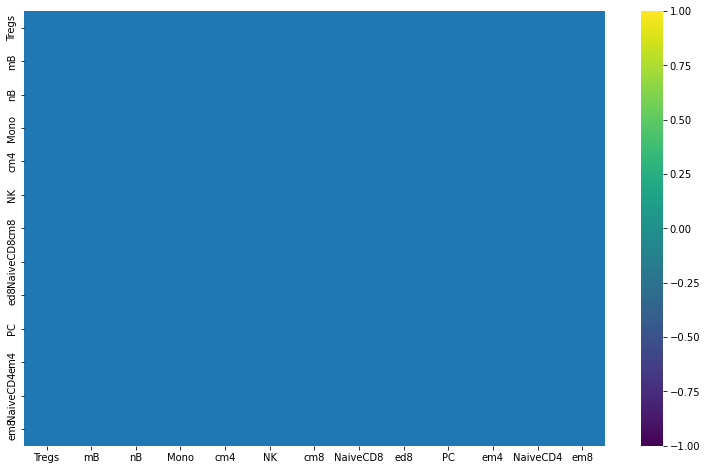

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=14)
ax.set_ylabel('Read Counting', fontsize=14)
ax.set_title('Pearson Correlation', fontsize=18)
plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

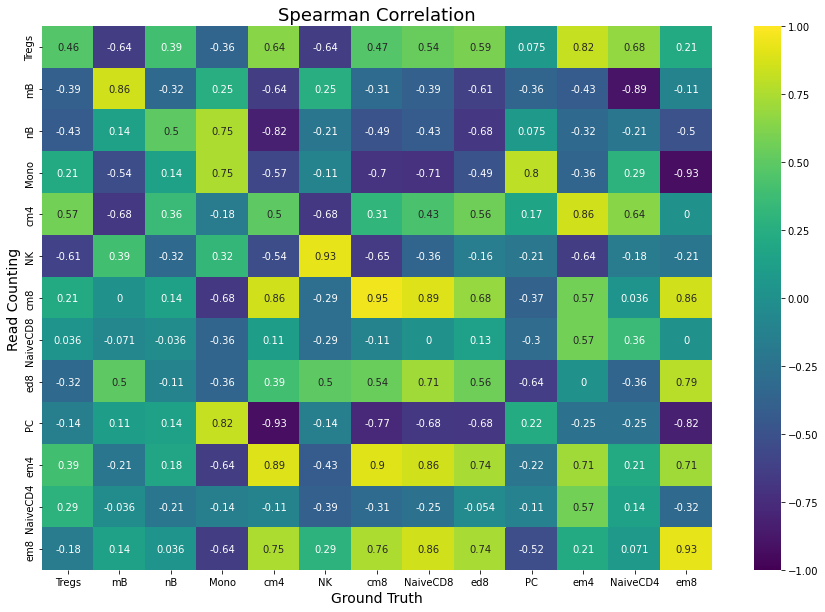

In [6]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=14)
ax2.set_ylabel('Read Counting', fontsize=14)
ax2.set_title('Spearman Correlation', fontsize=18)
plt.savefig(file + '_spearman.pdf', bbox_inches='tight')